# DATA MINING PROJECT

#### GROUP AE: Berfin Sakallioglu (20200545), Emil Ahmadov(20201004), Ema Mandura (20200647)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import sompy
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [2]:
#!conda install git
#!pip install -U git+https://github.com/joaopfonseca/SOMPY.git

In [3]:
data = pd.read_csv("donors.csv",sep=",",low_memory=False)

# Data Exploration

In [4]:
data.shape

(95412, 476)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 476 entries, Unnamed: 0 to GEOCODE2
dtypes: float64(49), int64(302), object(125)
memory usage: 346.5+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,95412.0,47705.500000,27543.216279,0.000000,23852.750000,47705.500000,71558.250000,95411.0
TCODE,95412.0,54.223117,953.844476,0.000000,0.000000,1.000000,2.000000,72002.0
NUMCHLD,12386.0,1.527773,0.806861,1.000000,1.000000,1.000000,2.000000,7.0
INCOME,74126.0,3.886248,1.854960,1.000000,2.000000,4.000000,5.000000,7.0
WEALTH1,50680.0,5.345699,2.742490,0.000000,3.000000,6.000000,8.000000,9.0
...,...,...,...,...,...,...,...,...
TIMELAG,85439.0,8.093739,8.213242,0.000000,4.000000,6.000000,11.000000,1088.0
AVGGIFT,95412.0,13.347786,10.769997,1.285714,8.384615,11.636364,15.477955,1000.0
CONTROLN,95412.0,95778.176959,55284.596094,1.000000,47910.750000,95681.500000,143643.500000,191779.0
HPHONE_D,95412.0,0.500618,0.500002,0.000000,0.000000,1.000000,1.000000,1.0


In [7]:
#conda install -c conda-forge pandas-profiling (in anaconda)

profile = ProfileReport(data, minimal=True)
profile.to_file("output.html")

NumExpr defaulting to 4 threads.


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0.
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'DejaV

findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Rockwell' (RO

findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 condensed>) = 0.5349999999999999
findfont: score(<Font 'Calibri' (calibrili.ttf) italic 

findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal roman normal>) = 10.145
findfont: score(<Font 'Tw Cen MT Condensed' (TCCM___

findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXSizeFourS

findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdana.ttf) no

findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Wingdings 2' (WINGDNG

findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>) = 10.44
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF

findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to Arial ('C:\\Windows\\Fonts\\arial.ttf') with score of 0.050000.
fi

findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALISTBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 n

findfont: score(<Font 'Dubai' (DUBAI-MEDIUM.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal semibold normal>) = 10.24
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Luc

findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>) = 10.44
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI Symbol

findfont: score(<Font 'Eras Demi ITC' (ERASDEMI.TTF) normal normal demi normal>) = 10.24
findfont: score(<Font 'Arial' (ARIALN.TTF) normal normal 400 condensed>) = 0.25
findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 norma

# Data Preprocessing & Feature Engineering

In [8]:
# Checking the highly correlated variables
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
corr = pd.DataFrame(so[(so>0.9) & (so<1)].drop_duplicates())
pd.options.display.max_rows = 113
corr

,,0
RAMNT_7,RAMNT_4,0.901209
HVP6,HV2,0.902442
RAMNT_3,LASTGIFT,0.902804
HUPA2,DW5,0.905181
HHD1,HHP1,0.905384
HHAGE1,AGEC6,0.905412
HV1,HVP6,0.906695
HU2,HU1,0.907210
HHD3,HHD2,0.907693
RAMNT_4,RAMNT_3,0.907750


In [9]:
# Chosing one of the highly correlated columns
drop = ['RAMNT_7', 'RAMNT_3', 'HUPA2', 'HHD1', 'HHAGE1',
          'HU2', 'HHD2', 'RP1', 'HHD4', 'HHD11', 'ETH13', 'HHN6','HVP2', 'TPE4',
          'HHD4', 'HUR2', 'HVP3', 'CARDGIFT', 'HHN3', 'LFC4', 'LFC5', 'RP1',
          'HHAGE3', 'HHAGE1', 'HHD5', 'AGE906', 'AGE902', 'HUR2', 'HVP1', 'HHD3',
          'RAMNT_4', 'DW6','RAMNT_8','HUPA6', 'AGE902', 'RAMNT_21', 'AGE903', 'HHN4',
          'IC4', 'ETHC4', 'HHD1', 'HVP1', 'RAMNT_4', 'IC13', 'HC8', 'HC18',
          'HVP1', 'LFC2', 'LFC3', 'RAMNT_10', 'HHN4', 'HV4', 'AGE905', 'AGE902',
          'DW6', 'RAMNT_19', 'HHN3', 'CARDPROM', 'IC12', 'IC10', 'AFC5', 'IC1', 'IC3',
        'DW2', 'HHN4', 'RAMNT_9', 'HHN3', 'ETHC4', 'RAMNT_19', 'IC3', 'AGE904', 'HHN3',
        'IC11', 'RAMNT_5', 'RAMNT_9', 'EIC1', 'ETH5', 'RAMNT_6', 'RAMNT_3',
        'AGE905', 'HHP2', 'AGE905', 'RHP3', 'HHN4', 'HHP2', 'AGE902', 'AGE903', 'AGE906',
        'IC14',  'IC3', 'RHP2', 'LFC2', 'RAMNT_8', 'RAMNT_5', 'IC4', 'DW5', 'IC3',
        'RAMNT_7', 'AGE905', 'RAMNT_14', 'RAMNT_5', 'AFC2', 'LFC5', 'HHD9','RAMNT_5', 'ETHC5', 'HVP2', 'HHAGE3', 'RAMNT_16']

In [10]:
corr_drop = []
for i in range(len(pd.DataFrame(drop).drop_duplicates().unstack())):
    corr_drop.append(pd.DataFrame(drop).drop_duplicates().reset_index().unstack()[0][i])

In [11]:
data = data.drop(corr_drop, axis=1)

In [12]:
data.shape

(95412, 408)

In [13]:
len(corr_drop)

68

In [14]:
# This column will be turned into recency format
data['ODATEDW'].dtypes

dtype('O')

In [15]:
def daydiff(a):
  diff = []
  for i in a:
    diff.append(i.days)
  return diff

In [16]:
data['ODATEDW'] = pd.to_datetime(data['ODATEDW'])

In [17]:
data['ODATEDW']

0       2009-01-01
1       2014-01-01
2       2010-01-01
3       2007-01-01
4       2006-01-01
           ...    
95407   2016-01-01
95408   2016-01-01
95409   2015-01-01
95410   2006-01-01
95411   2008-01-01
Name: ODATEDW, Length: 95412, dtype: datetime64[ns]

In [18]:
data['ODATEDWREC'] = (max(data['ODATEDW']) - data['ODATEDW'])
data['ODATEDWREC'] = daydiff(data['ODATEDWREC'])
data['ODATEDWREC']

0        2922
1        1096
2        2557
3        3653
4        4018
         ... 
95407     366
95408     366
95409     731
95410    4018
95411    3288
Name: ODATEDWREC, Length: 95412, dtype: int64

In [19]:
# Converting last date into recency
data['LASTDATE'] = pd.to_datetime(data['LASTDATE'])
data['RECENCY'] = (max(data['LASTDATE']) - data['LASTDATE'])
data['RECENCY'] = daydiff(data['RECENCY'])

In [20]:
# Converting date into days
data['MAXADATE'] = pd.to_datetime(data['MAXADATE'])
data['MAXAREC'] = (max(data['MAXADATE']) - data['MAXADATE'])
data['MAXAREC'] = daydiff(data['MAXAREC'])

In [21]:
# Converting date into days
data['FISTDATE'] = pd.to_datetime(data['FISTDATE'])
data['FISTREC'] = (max(data['FISTDATE']) - data['FISTDATE'])
data['FISTREC'] = daydiff(data['FISTREC'])

In [22]:
# Converting date of birth into age
data['DOB'].to_string
data['AGE'] = pd.to_numeric(data['DOB'].str[:4])
data['AGE'] = 2017 - data['AGE']
data['AGE']

0        60.0
1        45.0
2         NaN
3        69.0
4        77.0
         ... 
95407     NaN
95408    47.0
95409    59.0
95410    57.0
95411    79.0
Name: AGE, Length: 95412, dtype: float64

In [23]:
data['SOLP3'].value_counts()

      95232
00       80
12       72
01       18
02       10
Name: SOLP3, dtype: int64

In [24]:
data['SOLIH'].value_counts()

      89212
12     5693
00      296
01       94
02       75
03       19
04       16
06        7
Name: SOLIH, dtype: int64

In [25]:
data['SOLP3'] = data['SOLP3'].replace('00', '0')
data['SOLP3'] = data['SOLP3'].replace('01', '1')
data['SOLP3'] = data['SOLP3'].replace('02', '2')

In [26]:
data['SOLIH'] = data['SOLIH'].replace('00', '0')
data['SOLIH'] = data['SOLIH'].replace('01', '1')
data['SOLIH'] = data['SOLIH'].replace('02', '2')
data['SOLIH'] = data['SOLIH'].replace('03', '3')
data['SOLIH'] = data['SOLIH'].replace('04', '4')
data['SOLIH'] = data['SOLIH'].replace('06', '6')

In [27]:
non_metrics = ['Unnamed: 0', 'ODATEDW', 'DOB',  'OSOURCE', 'SOLP3', 'SOLIH', 'MAXADATE',
               'LASTDATE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH',
              'RECINHSE', 'FISTDATE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 
              'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'INCOME',
              'GENDER', 'WEALTH1', 'DATASRCE', 'MAJOR', 'WEALTH2', 'GEOCODE',
              'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 
              'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS',
              'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'ADATE_2',
               'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6', 'ADATE_7', 'ADATE_8',
               'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12', 'ADATE_13', 'ADATE_14',
               'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18', 'ADATE_19', 'ADATE_20',
               'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RFA_2', 'RFA_3',
              'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10', 
              'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
              'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
              'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7','RDATE_8', 'RDATE_9',
              'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 
              'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22',
              'RDATE_23', 'RDATE_24', 'MINRDATE', 'MAXRDATE', 'NEXTDATE', 'CONTROLN',
              'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A',
              'GEOCODE2']
metrics = data.columns.drop(non_metrics)

In [28]:
# Dropping the columns which are empty more than 30%
percentages = data[metrics].isna().sum()/data.shape[0]
percentages = percentages.sort_values(kind="quicksort", ascending = False)
percent3 = pd.DataFrame(percentages[(percentages>0.3)])
percent3.index

Index(['RAMNT_15', 'RAMNT_23', 'RAMNT_20', 'RAMNT_17', 'RAMNT_13', 'NUMCHLD',
       'RAMNT_11', 'RAMNT_24', 'RAMNT_18', 'RAMNT_22', 'RAMNT_12', 'MBCOLECT',
       'PUBNEWFN', 'PUBDOITY', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MAGMALE',
       'PUBGARDN', 'MAGFAML', 'MAGFEM', 'PUBOPP', 'PUBHLTH', 'PUBCULIN',
       'PUBPHOTO'],
      dtype='object')

In [29]:
data_metrics = data[metrics].drop(percent3.index, axis = 1)
data_metrics

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,...,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,ODATEDWREC,RECENCY,MAXAREC,FISTREC,AGE
0,0,0,39,34,18,10,2,1,992,264,...,5.0,12.0,10.0,4.0,7.741935,2922,428,0,2312.0,60.0
1,16,0,15,55,11,6,2,1,3611,940,...,10.0,25.0,25.0,18.0,15.666667,1096,428,0,882.0,45.0
2,2,0,20,29,33,6,8,1,7001,2040,...,2.0,16.0,5.0,12.0,7.481481,2557,428,0,2251.0,NaN
3,2,0,23,14,31,3,0,3,640,160,...,2.0,11.0,10.0,9.0,6.812500,3653,428,0,3316.0,69.0
4,60,1,28,9,53,26,3,2,2520,627,...,3.0,15.0,15.0,14.0,6.864865,4018,397,0,6210.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,14,36,47,11,7,8,13,27380,7252,...,25.0,25.0,25.0,NaN,25.000000,366,366,0,29.0,NaN
95408,1,0,31,43,19,4,1,0,1254,322,...,20.0,20.0,20.0,NaN,20.000000,366,337,0,0.0,47.0
95409,0,0,18,46,20,7,23,0,552,131,...,3.0,10.0,10.0,3.0,8.285714,731,123,0,517.0,59.0
95410,0,0,28,35,20,9,1,1,1746,432,...,5.0,21.0,18.0,4.0,12.146341,4018,31,0,3378.0,57.0


In [30]:
data = pd.concat((data_metrics, data[non_metrics]), axis=1)
data

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,...,NEXTDATE,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,0,39,34,18,10,2,1,992,264,...,2010-03-01,95515,0,L,4,E,X,X,X,C
1,16,0,15,55,11,6,2,1,3611,940,...,2015-04-01,148535,0,L,2,G,X,X,X,A
2,2,0,20,29,33,6,8,1,7001,2040,...,2011-01-01,15078,1,L,4,E,X,X,X,C
3,2,0,23,14,31,3,0,3,640,160,...,2007-11-01,172556,1,L,4,E,X,X,X,C
4,60,1,28,9,53,26,3,2,2520,627,...,2000-05-01,7112,1,L,2,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,14,36,47,11,7,8,13,27380,7252,...,NaN,184568,0,L,1,G,X,X,X,C
95408,1,0,31,43,19,4,1,0,1254,322,...,NaN,122706,1,L,1,F,X,X,X,A
95409,0,0,18,46,20,7,23,0,552,131,...,2015-01-01,189641,1,L,3,E,X,X,X,B
95410,0,0,28,35,20,9,1,1,1746,432,...,2007-04-01,4693,1,L,4,F,X,X,X,A


In [31]:
cols = data_metrics.columns

In [32]:
imputer = KNNImputer(n_neighbors=15)
imputer.fit(data_metrics)
data_metrics = pd.DataFrame(imputer.transform(data_metrics))
data_metrics.columns=cols

# Selecting variables

In [33]:
chosen_columns= ['MALEVET','VIETVETS','WWIIVETS','POP901','IC5','AVGGIFT']

In [34]:
data[chosen_columns].isna().sum()

MALEVET     0
VIETVETS    0
WWIIVETS    0
POP901      0
IC5         0
AVGGIFT     0
dtype: int64

Text(0.5, 1.0, 'MALEVET')

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
findfont: sco

findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Perpetua Titling MT' (PERTILI.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 3.6863636363636365
findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Dubai' (DUBAI-REGULAR.TTF) normal normal regular normal>) = 10.05
findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>) = 10.05
findfont: score(<Font '

findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Wingdings 2' (WINGDNG2.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal light normal>) = 10.24
findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibriz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Arial' (ARIALNB.TTF) normal normal 700 co

findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Constantia' (constanb.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Poor Richard' (POORICH.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Footlight MT Light' (FTLTLT.TTF) normal normal light normal>) = 10.24
findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) 

findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 nor

findfont: score(<Font 'Maiandra GD' (MAIAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Bell MT' (BELLI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Perpetua Titling MT' (PER

findfont: score(<Font 'Matura MT Script Capitals' (MATURASC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal semibold normal>) = 10.24
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
findfont: score(<Font 'Cambria' (cambria.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Berlin Sans FB' (BRLNSR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'S

findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Calisto MT' (CALIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Franklin Gothic Demi Cond' (FRADMCN.TTF) normal normal demi condensed>) = 10.44
findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
findfont: score(<Font 'Candara' (Candarali.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Pristina' (PRISTINA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constan.ttf) no

findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Modern No. 20' (MOD20.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 4.6863636363636365
findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 700 normal>) = 11.335
findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal norm

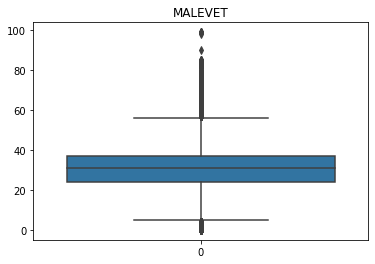

In [35]:
sns.boxplot(data = data_metrics['MALEVET']).set_title('MALEVET')

In [36]:
data[data['AGE901']>50]

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,...,NEXTDATE,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
39,13,0,36,20,40,14,2,1,526,65,...,2007-03-01,82335,0,L,1,G,X,X,X,D
66,2,0,45,18,59,11,2,1,4568,1317,...,2012-10-01,188800,1,L,2,G,X,X,X,B
79,3,0,20,24,33,14,2,3,5558,1633,...,2007-06-01,38885,1,L,2,F,X,X,X,A
81,2,1,35,19,47,6,5,2,1000,376,...,2012-11-01,98002,1,L,1,F,X,X,X,B
88,1,0,49,5,78,5,1,1,5613,1960,...,NaN,39862,1,L,1,G,X,X,X,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95310,16,0,46,8,59,10,0,2,2106,612,...,2012-05-01,40051,1,L,1,G,X,X,X,A
95330,7,0,45,11,67,5,2,1,2636,933,...,2008-09-01,43867,1,L,4,F,X,X,X,B
95348,3,1,55,15,72,9,2,2,3469,1188,...,2010-03-01,185087,1,L,1,G,D,2,M,A
95357,24,0,27,33,49,0,1,3,3411,634,...,2008-12-01,28154,1,L,1,F,X,X,X,A


In [37]:
data_metrics[data_metrics['AGE901'] < 20].shape[0]/data_metrics.shape[0]

0.010103550916027335

Text(0.5, 1.0, 'VIETVETS')

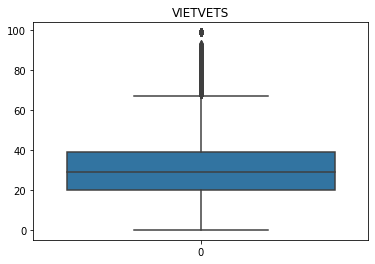

In [38]:
sns.boxplot(data = data_metrics['VIETVETS']).set_title('VIETVETS')

In [39]:
data_metrics[data_metrics['RAMNTALL'] > 70].shape[0]/data_metrics.shape[0]

0.5427933593258709

Text(0.5, 1.0, 'WWIIVETS')

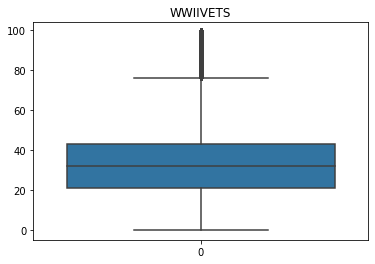

In [40]:
sns.boxplot(data = data_metrics['WWIIVETS']).set_title('WWIIVETS')

In [41]:
data_metrics[data_metrics['WWIIVETS'] > 78].shape[0]/data_metrics.shape[0]

0.0136880057015889

Text(0.5, 1.0, 'POP901')

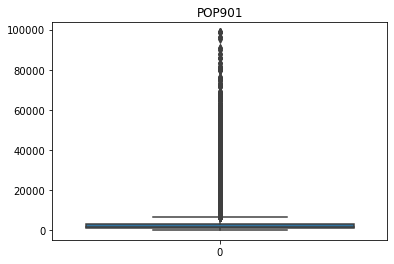

In [42]:
sns.boxplot(data = data_metrics['POP901']).set_title('POP901')

In [43]:
data_metrics['POP901'].min()

0.0

Text(0.5, 1.0, 'IC5')

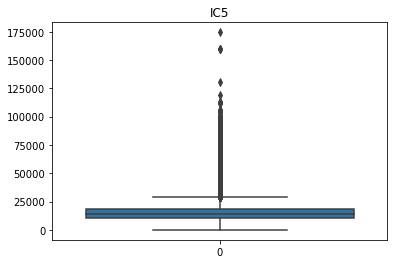

In [44]:
sns.boxplot(data = data_metrics['IC5']).set_title('IC5')

Text(0.5, 1.0, 'AVGGIFT')

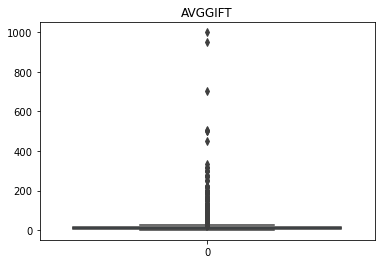

In [45]:
sns.boxplot(data = data_metrics['AVGGIFT']).set_title('AVGGIFT')

In [46]:
c_data=data_metrics[chosen_columns]

# Scaling clustering data

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
c_data = pd.DataFrame(scaler.fit_transform(c_data))
c_data.columns=chosen_columns
c_data

,MALEVET,VIETVETS,WWIIVETS,POP901,IC5,AVGGIFT
0,0.393939,0.343434,0.181818,0.010051,0.073818,0.006465
1,0.151515,0.555556,0.111111,0.036585,0.207279,0.014399
2,0.202020,0.292929,0.333333,0.070931,0.066329,0.006204
3,0.232323,0.141414,0.313131,0.006484,0.086693,0.005534
4,0.282828,0.090909,0.535354,0.025532,0.056359,0.005586
...,...,...,...,...,...,...
95407,0.363636,0.474747,0.111111,0.277403,0.107762,0.023745
95408,0.313131,0.434343,0.191919,0.012705,0.152060,0.018738
95409,0.181818,0.464646,0.202020,0.005593,0.069779,0.007009
95410,0.282828,0.353535,0.202020,0.017690,0.091381,0.010875


In [48]:
c_data=data_metrics[chosen_columns]


# Self-organazing maps

In [49]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    c_data.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=chosen_columns
)
sm.train(n_job=3, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.004000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.318000, quantization error: 4.993908

 epoch: 2 ---> elapsed time:  0.384000, quantization error: 1.998587

 epoch: 3 ---> elapsed time:  0.347000, quantization error: 1.967874

 epoch: 4 ---> elapsed time:  0.350000, quantization error: 1.928705

 epoch: 5 ---> elapsed time:  0.320000, quantization error: 1.916784

 epoch: 6 ---> elapsed time:  0.374000, quantization error: 1.910721

 epoch: 7 ---> elapsed time:  0.327000, quantization error: 1.906879

 epoch: 8 ---> elapsed time:  0.344000, quantization error: 1.903847

 epoch: 9 ---> elapsed time:  0.310000, quantization error: 1.898980

 epoch: 10 ---> elapsed time:  0.327000, quantization error: 1.891067

 epoch: 11 ---> elapsed time:  0.312000, quantization error: 1.884516

 epoch: 12 ---> elapsed time:  0.324000, quantization error: 1.881371

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.378000, quantization error: 1.156937

 epoch: 15 ---> elapsed time:  0.314000, quantization error: 1.156834

 epoch: 16 ---> elapsed time:  0.344000, quantization error: 1.156749

 epoch: 17 ---> elapsed time:  0.351000, quantization error: 1.156732

 epoch: 18 ---> elapsed time:  0.328000, quantization error: 1.156667

 epoch: 19 ---> elapsed time:  0.362000, quantization error: 1.156608

 epoch: 20 ---> elapsed time:  0.339000, quantization error: 1.156595

 epoch: 21 ---> elapsed time:  0.331000, quantization error: 1.156589

 epoch: 22 ---> elapsed time:  0.366000, quantization error: 1.156571

 epoch: 23 ---> elapsed time:  0.370000, quantization error: 1.156541

 epoch: 24 ---> elapsed time:  0.351000, quantization error: 1.156521

 epoch: 25 ---> elapsed time:  0.339000, quantization error: 1.156509

 epoch: 26 ---> elapsed time:  0.376000, quantization error: 1.156516

 epoch: 27 ---> elapsed time:  0.355000, quantization error: 1.156531

 epoch

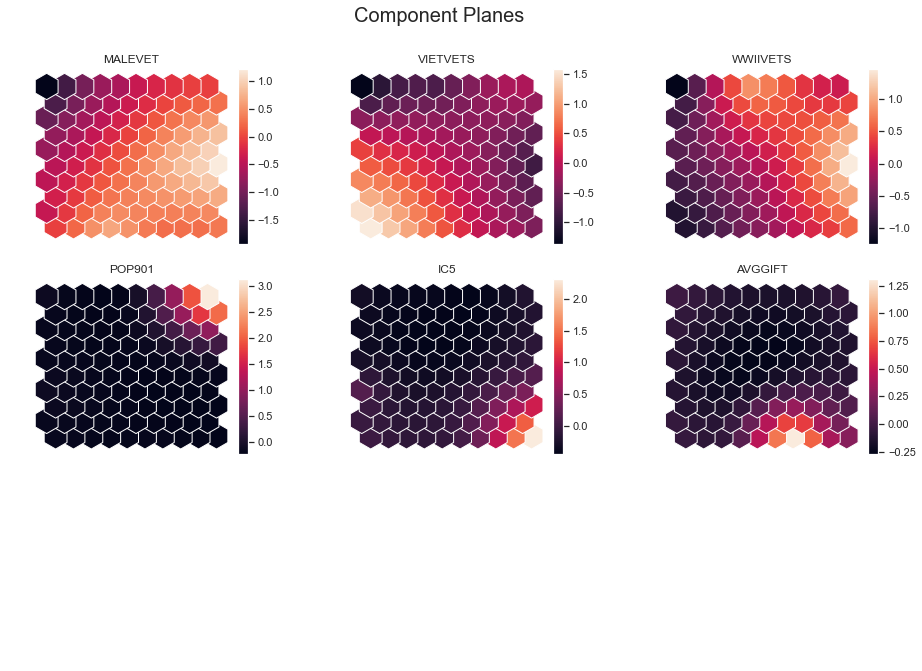

In [50]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

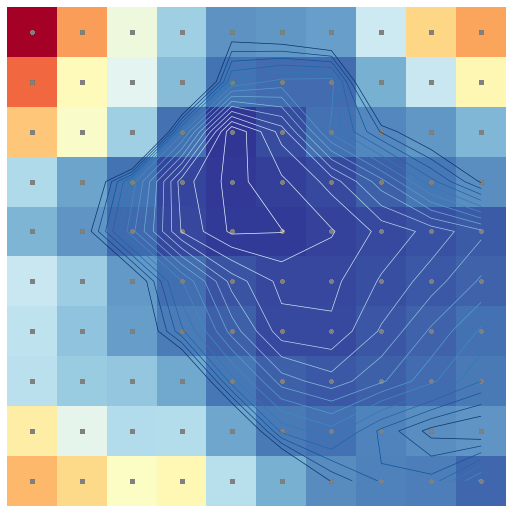

array([[0.79080921, 0.63229846, 0.47338273, 0.37618572, 0.30448049,
        0.3088696 , 0.31810157, 0.42535506, 0.57236977, 0.62475531],
       [0.67852474, 0.50846209, 0.45347928, 0.35208155, 0.27403497,
        0.26655173, 0.26560688, 0.33499119, 0.42019659, 0.51769491],
       [0.58871893, 0.4931596 , 0.3766447 , 0.27114773, 0.21566067,
        0.23592518, 0.27056799, 0.29318367, 0.30962875, 0.34549847],
       [0.39151599, 0.32230117, 0.27206511, 0.23007259, 0.21925912,
        0.22623511, 0.23569128, 0.2547587 , 0.27846992, 0.29947162],
       [0.34270004, 0.30586018, 0.26478033, 0.23284516, 0.22037548,
        0.22133724, 0.22690117, 0.23501883, 0.24127796, 0.24972294],
       [0.42058628, 0.37354602, 0.31067838, 0.26904268, 0.24281319,
        0.23140872, 0.23171541, 0.24005006, 0.24818314, 0.25797031],
       [0.41017028, 0.3597542 , 0.31673859, 0.28191511, 0.25451538,
        0.23582662, 0.23450357, 0.24605346, 0.25805171, 0.26981765],
       [0.4064225 , 0.37099782, 0.3649988

In [51]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance2=1, 
    row_normalized=False, 
    show_data=True, 
    contooor=True, # Visualize isomorphic curves
    blob=False
)

UMAT[1]  # U-matrix values - no colorscale so we have to rely on the values :(

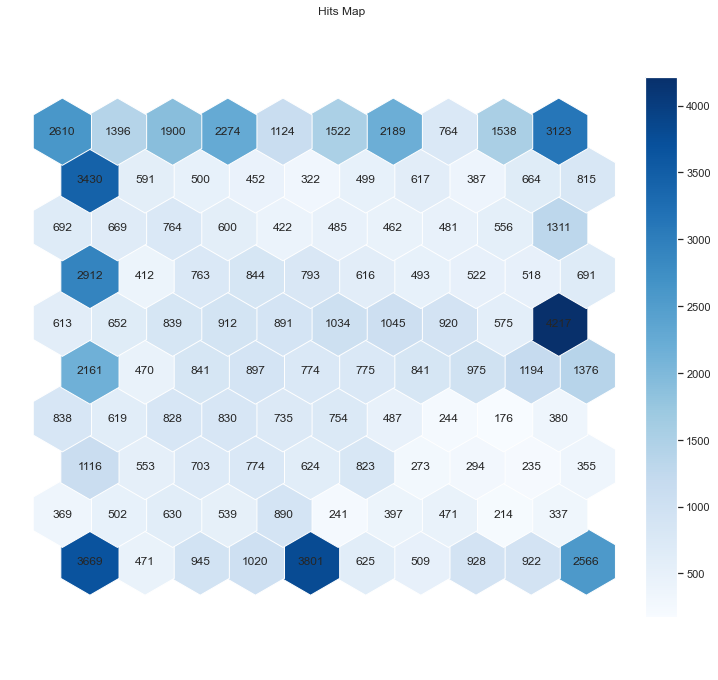

In [52]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()

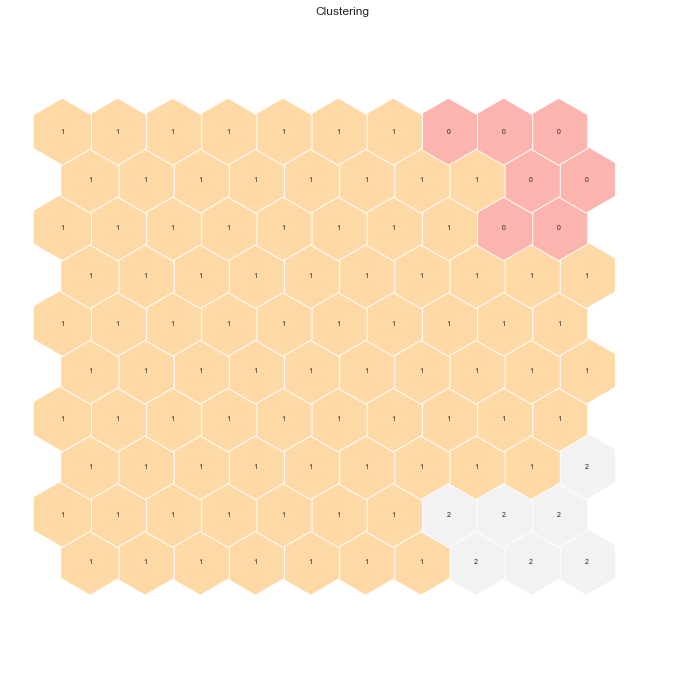

In [53]:
# Perform K-Means clustering on top of the 2500 untis (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm.cluster(kmeans)

hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

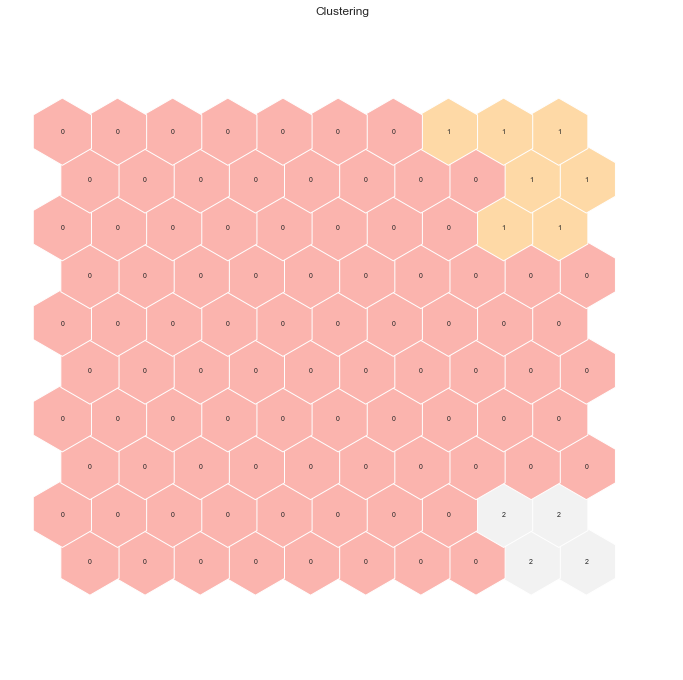

In [54]:
# Perform Hierarchical clustering on top of the 2500 untis (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward')
nodeclus_labels = sm.cluster(hierclust)

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [55]:
# Check the nodes and and respective clusters
nodes = sm.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=c_data.columns)
df_nodes['label'] = nodeclus_labels
df_nodes

,MALEVET,VIETVETS,WWIIVETS,POP901,IC5,AVGGIFT,label
0,30.005415,28.229006,34.786189,21296.712845,14043.844078,12.810000,2
1,29.953225,28.125360,35.822040,14312.939815,13241.297562,12.305062,2
2,29.035597,26.339109,38.388353,9167.716064,12383.053380,11.912207,0
3,27.771181,23.678009,42.038615,5485.615190,12041.399919,11.704476,0
4,26.028389,20.976975,45.487685,3091.567619,12123.978732,11.673146,0
5,23.744728,18.118125,47.705858,2025.344921,12388.003142,11.755084,0
6,22.218877,18.400798,40.410895,1947.800408,12357.139921,12.015555,0
7,19.337420,17.220568,31.958650,2017.298716,12437.509324,12.355573,0
8,14.625307,14.275390,21.572126,2228.705435,12645.767559,12.730744,0
9,8.392057,9.160495,10.659467,2543.506754,13175.674681,13.192128,0


In [56]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(c_data)[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((data, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(data.columns,"BMU")
)
df_bmus

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,...,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,BMU
0,0,0,39,34,18,10,2,1,992,264,...,95515,0,L,4,E,X,X,X,C,90
1,16,0,15,55,11,6,2,1,3611,940,...,148535,0,L,2,G,X,X,X,A,90
2,2,0,20,29,33,6,8,1,7001,2040,...,15078,1,L,4,E,X,X,X,C,90
3,2,0,23,14,31,3,0,3,640,160,...,172556,1,L,4,E,X,X,X,C,90
4,60,1,28,9,53,26,3,2,2520,627,...,7112,1,L,2,F,X,X,X,A,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,14,36,47,11,7,8,13,27380,7252,...,184568,0,L,1,G,X,X,X,C,0
95408,1,0,31,43,19,4,1,0,1254,322,...,122706,1,L,1,F,X,X,X,A,90
95409,0,0,18,46,20,7,23,0,552,131,...,189641,1,L,3,E,X,X,X,B,90
95410,0,0,28,35,20,9,1,1,1746,432,...,4693,1,L,4,F,X,X,X,A,90


In [57]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,...,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,BMU,label
0,0,0,39,34,18,10,2,1,992,264,...,0,L,4,E,X,X,X,C,90,1
1,16,0,15,55,11,6,2,1,3611,940,...,0,L,2,G,X,X,X,A,90,1
2,2,0,20,29,33,6,8,1,7001,2040,...,1,L,4,E,X,X,X,C,90,1
3,2,0,23,14,31,3,0,3,640,160,...,1,L,4,E,X,X,X,C,90,1
4,60,1,28,9,53,26,3,2,2520,627,...,1,L,2,F,X,X,X,A,90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,14,36,47,11,7,8,13,27380,7252,...,0,L,1,G,X,X,X,C,0,2
95408,1,0,31,43,19,4,1,0,1254,322,...,1,L,1,F,X,X,X,A,90,1
95409,0,0,18,46,20,7,23,0,552,131,...,1,L,3,E,X,X,X,B,90,1
95410,0,0,28,35,20,9,1,1,1746,432,...,1,L,4,F,X,X,X,A,90,1


# KMeans->Hierarchical->KMeans

In [58]:
kmclust = KMeans(n_clusters=100, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(c_data)
km_labels

array([11, 14, 71, ..., 73, 76, 62])

In [59]:
df_concat = pd.concat((c_data, pd.Series(km_labels, name='kmlabels')), axis=1)
df_concat

,MALEVET,VIETVETS,WWIIVETS,POP901,IC5,AVGGIFT,kmlabels
0,39.0,34.0,18.0,992.0,12883.0,7.741935,11
1,15.0,55.0,11.0,3611.0,36175.0,15.666667,14
2,20.0,29.0,33.0,7001.0,11576.0,7.481481,71
3,23.0,14.0,31.0,640.0,15130.0,6.812500,27
4,28.0,9.0,53.0,2520.0,9836.0,6.864865,94
...,...,...,...,...,...,...,...
95407,36.0,47.0,11.0,27380.0,18807.0,25.000000,3
95408,31.0,43.0,19.0,1254.0,26538.0,20.000000,60
95409,18.0,46.0,20.0,552.0,12178.0,8.285714,73
95410,28.0,35.0,20.0,1746.0,15948.0,12.146341,76


In [60]:
hc=df_concat.groupby('kmlabels').mean()
hc

,MALEVET,VIETVETS,WWIIVETS,POP901,IC5,AVGGIFT
kmlabels,,,,,,
0,32.941011,23.297753,41.710674,1462.662921,43808.901685,16.536577
1,30.096080,30.497310,31.778632,5646.787087,10965.844735,12.871535
2,32.593106,30.111111,33.895968,1215.550015,17676.663281,13.595951
3,28.877660,28.739362,27.845745,27609.271277,16122.255319,15.831111
4,30.161050,28.863584,33.608878,1023.224262,9762.930049,12.108586
5,32.551205,28.655422,35.966867,1286.001205,23719.981325,14.570724
6,34.463054,21.551724,46.251232,1721.906404,56384.635468,18.443617
7,33.357143,20.285714,44.726190,1354.654762,80142.071429,25.622117
8,23.000000,26.500000,33.666667,58211.981481,10476.814815,14.121213


In [61]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(hc)

array([62, 82, 96, 95, 98, 90, 56, 77, 67, 65, 61, 99, 71, 85, 72, 66, 83,
       88, 70, 63, 47, 78, 80, 92, 87, 84, 57, 97, 81, 55, 48, 38, 75, 73,
       94, 59, 52, 60, 43, 23, 69, 68, 49, 51, 58, 91, 28, 29, 35, 86, 93,
       54, 27, 30, 46, 50, 33, 53, 89, 45, 41, 79, 76, 74, 39, 22, 14, 26,
       42, 64, 31, 37, 36, 20, 40, 19, 32, 44, 18, 15, 21, 34, 24, 16, 17,
        9, 11, 10,  4, 25,  8,  7, 12,  3,  1, 13,  5,  6,  2,  0],
      dtype=int64)

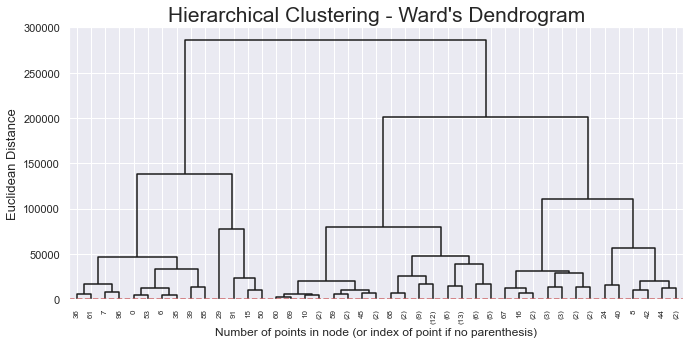

In [62]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)

plt.savefig("dendogram.png")

In [63]:

kmclust = KMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(c_data)
km_labels


array([0, 2, 0, ..., 0, 0, 0])

In [64]:

clustered = pd.concat((data, pd.Series(km_labels, name='labels')), axis=1)
clustered

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,...,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,labels
0,0,0,39,34,18,10,2,1,992,264,...,95515,0,L,4,E,X,X,X,C,0
1,16,0,15,55,11,6,2,1,3611,940,...,148535,0,L,2,G,X,X,X,A,2
2,2,0,20,29,33,6,8,1,7001,2040,...,15078,1,L,4,E,X,X,X,C,0
3,2,0,23,14,31,3,0,3,640,160,...,172556,1,L,4,E,X,X,X,C,0
4,60,1,28,9,53,26,3,2,2520,627,...,7112,1,L,2,F,X,X,X,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,14,36,47,11,7,8,13,27380,7252,...,184568,0,L,1,G,X,X,X,C,1
95408,1,0,31,43,19,4,1,0,1254,322,...,122706,1,L,1,F,X,X,X,A,2
95409,0,0,18,46,20,7,23,0,552,131,...,189641,1,L,3,E,X,X,X,B,0
95410,0,0,28,35,20,9,1,1,1746,432,...,4693,1,L,4,F,X,X,X,A,0


In [65]:
clustered.groupby('labels')[chosen_columns].mean()

,MALEVET,VIETVETS,WWIIVETS,POP901,IC5,AVGGIFT
labels,,,,,,
0,30.367244,30.102149,32.031173,2426.371964,13421.209472,13.008354
1,27.958008,29.258138,31.037760,28973.649740,14316.350260,14.262936
2,31.718875,26.866218,37.575719,2207.205861,33155.791682,15.604986


In [66]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  

# DBSCAN


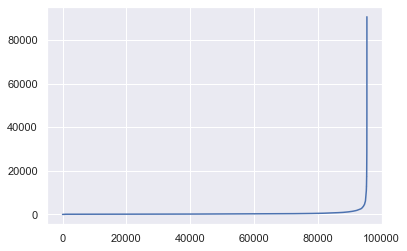

In [67]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=100)
neigh.fit(c_data)
distances, _ = neigh.kneighbors(c_data)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [68]:
plt.savefig("epsvalue.png")

<Figure size 432x288 with 0 Axes>

In [69]:
dbscan = DBSCAN(eps=10, min_samples=1000, n_jobs=4)
dbscan_labels = dbscan.fit_predict(c_data)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 1


In [70]:
dbscan_clustered = pd.concat((data, pd.Series(dbscan_labels, index=data.index, name="dbscan_labels")), axis=1)
dbscan_clustered.groupby('dbscan_labels')[chosen_columns].mean()

,MALEVET,VIETVETS,WWIIVETS,POP901,IC5,AVGGIFT
dbscan_labels,,,,,,
-1,30.445332,29.702312,32.637719,3255.880204,15722.73823,13.347786


In [71]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [72]:
# Computing the R^2 of the cluster solution
sst = get_ss(c_data)  # get total sum of squares
ssw_labels = dbscan_clustered.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of -36.0750


# Cluster analysis

In [73]:
non_metrics=['ODATEDW',
 'AGE',
 'OSOURCE',
 'SOLP3',
 'SOLIH',
 'MAXADATE',
 'LASTDATE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'NOEXCH',
 'RECINHSE',
 'FISTDATE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'DATASRCE',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_8',
 'RDATE_9',
 'RDATE_10',
 'RDATE_11',
 'RDATE_12',
 'RDATE_13',
 'RDATE_14',
 'RDATE_15',
 'RDATE_16',
 'RDATE_17',
 'RDATE_18',
 'RDATE_19',
 'RDATE_20',
 'RDATE_21',
 'RDATE_22',
 'RDATE_23',
 'RDATE_24',
 'MINRDATE',
 'MAXRDATE',
 'NEXTDATE',
 'CONTROLN',
 'HPHONE_D',
 'RFA_2R',
 'RFA_2F',
 'RFA_2A',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'GEOCODE2']

In [74]:
hobbies=['COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES']

In [75]:
# Percentage of the "Yes" answer to hobbies
for hobby in hobbies:
    vc=clustered.groupby('labels')[hobby].value_counts('Y')
    print(vc)

labels  COLLECT1
0                   0.943996
        Y           0.056004
1                   0.946289
        Y           0.053711
2                   0.956225
        Y           0.043775
Name: COLLECT1, dtype: float64
labels  VETERANS
0                   0.888018
        Y           0.111982
1                   0.904622
        Y           0.095378
2                   0.906898
        Y           0.093102
Name: VETERANS, dtype: float64
labels  BIBLE
0                0.902301
        Y        0.097699
1                0.918620
        Y        0.081380
2                0.938751
        Y        0.061249
Name: BIBLE, dtype: float64
labels  CATLG
0                0.917531
        Y        0.082469
1                0.931641
        Y        0.068359
2                0.913906
        Y        0.086094
Name: CATLG, dtype: float64
labels  HOMEE
0                0.991100
        Y        0.008900
1                0.992188
        Y        0.007812
2                0.987350
        Y       

In [76]:
# Non-metric features' modes
for col in non_metrics:
    print(clustered.groupby('labels')[col].agg(pd.Series.mode).to_frame())

          ODATEDW
labels           
0      2015-01-01
1      2015-01-01
2      2015-01-01
         AGE
labels      
0       67.0
1       49.0
2       77.0
       OSOURCE
labels        
0          MBC
1          MBC
2          AML
       SOLP3
labels      
0           
1           
2           
       SOLIH
labels      
0           
1           
2           
         MAXADATE
labels           
0      2017-02-01
1      2017-02-01
2      2017-02-01
         LASTDATE
labels           
0      2015-12-01
1      2015-12-01
2      2015-12-01
        TCODE
labels       
0           0
1           0
2           0
       STATE
labels      
0         CA
1         CA
2         CA
          ZIP
labels       
0       85351
1       95758
2       92037
       MAILCODE
labels         
0              
1              
2              
       PVASTATE
labels         
0              
1              
2              
       NOEXCH
labels       
0           0
1           0
2           0
       RECINHSE
labels   

           RDATE_8
labels            
0       2016-01-01
1       2016-01-01
2       2016-01-01
           RDATE_9
labels            
0       2015-12-01
1       2015-12-01
2       2015-12-01
          RDATE_10
labels            
0       2015-11-01
1       2015-11-01
2       2015-11-01
          RDATE_11
labels            
0       2015-11-01
1       2015-11-01
2       2015-11-01
          RDATE_12
labels            
0       2015-09-01
1       2015-09-01
2       2015-09-01
          RDATE_13
labels            
0       2015-08-01
1       2015-08-01
2       2015-08-01
          RDATE_14
labels            
0       2015-06-01
1       2015-06-01
2       2015-06-01
          RDATE_15
labels            
0       2015-05-01
1       2015-05-01
2       2015-05-01
          RDATE_16
labels            
0       2015-04-01
1       2015-04-01
2       2015-04-01
          RDATE_17
labels            
0       2015-03-01
1       2015-03-01
2       2015-03-01
          RDATE_18
labels            
0       2015

ValueError: Must produce aggregated value

In [77]:
# In order to inspect the variables one by one:
inspect=clustered.groupby('labels').mean()

In [78]:
inspect.iloc[:,0:20]

,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4
labels,,,,,,,,,,,,,,,,,,,,
0,3.266115,1.096089,30.367244,30.102149,32.031173,6.977308,4.668564,3.238187,2426.371964,653.465594,903.687899,54.376586,14.819513,29.003749,48.179074,50.839328,84.135203,8.046366,0.859499,2.619972
1,1.697591,1.801432,27.958008,29.258138,31.037760,6.461914,5.046224,3.237305,28973.649740,7380.671224,10739.416016,62.849935,18.455729,18.311523,48.843099,51.156901,80.978190,10.303711,0.714518,3.610677
2,4.185020,0.485166,31.718875,26.866218,37.575719,5.949308,3.694667,2.132872,2207.205861,609.443484,922.813524,88.590917,3.408719,7.130870,48.276938,51.723608,91.263742,2.387969,0.182836,4.824081


In [79]:
inspect.iloc[:,20:40]

,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH14,ETH15,ETH16,AGE901,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5
labels,,,,,,,,,,,,,,,,,,,,
0,0.181090,0.319230,0.476915,0.562383,0.208710,0.220720,0.072451,0.319673,0.300054,1.470769,33.784443,25.139222,39.629671,38.437998,20.792445,12.520540,22.694746,20.408976,13.650076,11.651219
1,0.203776,0.443034,0.730143,0.734701,0.302083,0.199544,0.075195,0.448893,1.010091,2.546549,32.079427,25.375651,41.012695,38.437826,20.524089,14.957357,23.843424,20.395833,13.324219,10.911458
2,0.477976,0.962960,1.586094,0.506462,0.546232,0.136240,0.036403,0.134237,0.339279,1.542046,40.259829,19.653622,38.922370,37.740262,22.797506,9.028759,17.989170,22.531398,17.281398,13.651711


In [80]:
inspect.iloc[:,40:60]

,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE2,HHN1,HHN2,HHN5,MARR1,MARR2,MARR3,MARR4,HHP1,DW1,DW3,DW4,DW7
labels,,,,,,,,,,,,,,,,,,,,
0,10.440432,7.658460,16.144496,16.195299,31.746275,19.683511,15.085702,9.496484,22.655829,33.032230,10.830760,57.752594,10.85709,7.545924,22.866285,186.647015,69.721027,3.056188,18.668822,1.831535
1,9.458984,7.072917,16.751302,16.617839,31.736654,19.433919,15.453776,9.197266,24.178385,32.375651,10.939779,55.228841,11.48112,7.206706,26.081055,184.815755,64.724284,3.628906,26.660156,2.909831
2,11.607845,7.904714,16.245450,15.592009,30.779669,20.366855,16.468966,8.497816,23.670550,38.410266,7.676556,61.480160,9.26083,6.588096,22.680743,175.217055,74.265744,1.547324,23.485075,1.168092


In [81]:
inspect.iloc[:,60:80]

,DW8,DW9,HV1,HV2,HV3,HU1,HU3,HU4,HU5,HHD6,HHD7,HHD8,HHD10,HHD12,ETHC1,ETHC2,ETHC3,ETHC6,HVP4,HVP5
labels,,,,,,,,,,,,,,,,,,,,
0,1.197684,0.627127,856.171612,918.321971,3.812371,69.028407,89.712681,9.283496,13.585652,16.871583,8.361601,1.718876,13.533165,4.667089,17.087595,50.140943,16.954064,0.908066,45.416179,70.668576
1,1.387370,1.449544,1024.192383,1136.381836,3.912109,63.300130,91.718099,8.281901,12.624349,19.133464,9.369141,1.801758,14.909505,5.628255,16.240885,49.963867,14.784505,1.105469,51.448893,75.008138
2,0.820167,0.345741,2595.059884,2721.738988,7.360939,76.434019,91.356935,8.634237,15.171005,19.403622,3.845195,0.869767,13.812068,5.747452,14.422370,55.792501,21.069621,0.228431,93.729705,97.573717


In [82]:
inspect.iloc[:,80:100]

,HVP6,HUR1,RHP1,RHP4,HUPA1,HUPA3,HUPA4,HUPA5,HUPA7,RP2,RP3,RP4,MSA,ADI,DMA,IC2,IC5,IC6,IC7,IC8
labels,,,,,,,,,,,,,,,,,,,,
0,2.560158,4.873058,51.765623,4.484561,10.251266,9.579199,11.724432,5.430069,1.806692,37.64988,56.154059,74.647593,3379.674957,195.864492,660.294644,346.850538,13421.209472,23.115633,17.982299,16.488199
1,6.469727,6.761393,51.651693,4.695964,13.407878,7.612956,12.128255,6.989258,1.538411,40.88737,60.205078,78.947917,3518.728190,182.169271,667.919596,357.237956,14316.350260,24.415690,17.989583,16.085612
2,35.212050,4.182108,61.953950,3.623134,8.526756,1.199581,6.699126,3.169003,0.196396,77.69949,85.655442,89.726247,4624.747452,125.917364,690.328358,692.811340,33155.791682,8.705224,8.651620,10.168001


In [83]:
inspect.iloc[:,100:120]

,IC9,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3
labels,,,,,,,,,,,,,,,,,,,,
0,18.782697,16.128307,17.229115,17.507621,21.402596,17.997517,5.359155,1.694513,0.624484,0.925128,27.049661,6.582678,40.175669,11.589992,47.934704,51.020503,11.843802,75.540122,13.579605,2.274351
1,17.929688,17.064128,16.871094,16.763997,20.388346,17.916016,6.025065,2.271484,0.882487,1.743815,25.168294,7.242188,39.241862,13.187174,51.597982,48.400065,13.637695,75.691406,13.694010,3.026367
2,15.156261,4.294048,6.009465,8.391791,14.831999,23.824172,15.812250,9.418548,4.878504,12.477157,25.089552,2.228795,64.639698,3.770568,50.620677,49.377230,15.096742,80.321169,8.492992,3.145795


In [84]:
inspect.iloc[:,120:140]

,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3
labels,,,,,,,,,,,,,,,,,,,,
0,0.363458,0.092684,0.244936,4.155546,3.110692,2.341123,18.493792,19.318333,23.556434,5.314965,59.411938,64.277694,64.499779,48.813932,70.402117,63.857016,7.056667,12.698077,11.163499,3.522483
1,0.442057,0.072591,0.189128,4.664388,2.592448,2.065430,16.565430,19.041341,23.413411,5.092448,59.420573,65.889323,64.156901,47.365234,72.634115,88.937500,8.341146,13.864909,12.033529,3.685221
2,1.134692,0.178285,0.209410,3.282035,4.499636,1.779669,17.348835,20.802876,25.048598,5.302148,64.880597,66.031853,61.217965,49.085548,67.175737,46.475064,3.048052,24.742810,23.358573,3.638242


In [85]:
inspect.iloc[:,140:160]

,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11
labels,,,,,,,,,,,,,,,,,,,,
0,11.718470,15.790982,0.411975,1.722269,11.173161,3.152903,12.207039,6.927009,4.382449,4.051099,0.742010,6.655841,17.480406,4.387587,2.745317,4.232717,17.266939,6.169473,4.586833,3.327515
1,12.403646,15.992188,0.397461,1.755208,11.230143,2.038411,11.411784,7.124349,4.000326,3.967122,0.452474,6.129232,17.956706,4.381185,2.611654,4.355143,17.773438,6.532878,4.747396,3.340169
2,17.471423,13.251365,0.477976,1.039589,5.699854,0.888879,5.217146,1.507463,1.274663,1.389516,0.624681,4.682654,12.901711,3.459228,2.517747,5.383873,14.094376,12.070258,5.356480,2.967055


In [86]:
inspect.iloc[:,160:180]

,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8
labels,,,,,,,,,,,,,,,,,,,,
0,1.449946,7.884723,7.926271,5.870722,4.744370,7.133568,4.770737,3.318984,7.706387,69.512956,5.982385,0.494665,124.955846,9.594392,13.901441,30.403690,20.606635,6.520872,12.109696,5.823864
1,1.494792,8.235352,8.374674,6.409180,4.817383,6.859701,5.345052,3.491536,6.951497,70.920573,6.018555,0.302083,126.894531,10.082357,13.701172,28.156901,20.649740,6.676432,13.611654,7.093750
2,2.283764,9.201220,8.924372,10.992810,3.342373,6.125592,3.782399,2.125228,10.888424,69.594922,6.874590,0.575173,151.042774,2.301329,4.792410,16.460047,22.198398,6.683564,28.710138,18.860029


In [87]:
inspect.iloc[:,180:200]

,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC3,AFC4,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7
labels,,,,,,,,,,,,,,,,,,,,
0,3.370944,22.618411,1.844909,17.590545,6.556803,0.618116,0.153186,15.498832,1.298100,30.956940,17.623845,32.606832,11.990793,0.741272,5.287946,0.870034,10.398589,0.158509,0.152350,4.851989
1,3.737630,24.046224,1.908529,17.658529,8.214844,1.322917,0.263346,14.400716,1.327148,31.165039,17.318034,32.108724,13.848633,0.580404,4.784831,0.815430,8.864258,0.089193,0.084961,4.636719
2,6.352839,17.653804,2.163997,13.574172,8.281034,0.234074,0.057062,16.460957,1.134692,27.659447,20.296505,39.421642,5.595741,0.597834,7.023025,0.849836,8.842191,0.456862,0.389971,4.899254


In [88]:
inspect.iloc[:,200:220]

,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3
labels,,,,,,,,,,,,,,,,,,,,
0,1.657931,0.788561,1.295113,0.168072,0.224789,0.680020,0.706129,0.068923,6.109745,58.830146,87.861552,6.151699,1.717831,3.187973,91.303312,59.503811,19.737978,6.902240,24.072586,2.474678
1,1.641927,0.631836,1.058919,0.112305,0.410807,0.662435,0.539714,0.017253,9.216146,56.684570,84.965820,9.236654,2.361328,3.377604,90.966146,56.633789,17.767578,5.432617,24.047201,2.416016
2,2.959046,0.723244,1.692210,0.182290,1.661631,1.090280,0.929833,0.164179,9.715417,43.821351,87.814161,3.846560,2.887605,5.446305,95.542592,67.885238,22.689752,6.961503,22.368311,3.490717


In [89]:
inspect.iloc[:,220:240]

,HC4,HC5,HC6,HC7,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2
labels,,,,,,,,,,,,,,,,,,,,
0,11.865941,21.961415,45.197758,61.448250,1.961574,1.095548,50.127606,7.647175,29.679578,4.902510,0.071455,5.914409,80.864871,69.530952,97.332936,93.803103,7.371595,2.211550,5.705305,5.877840
1,12.219727,22.612630,45.827474,62.030599,3.186849,1.849609,51.437174,4.984701,34.174479,4.320638,0.028646,4.134766,88.761068,78.895833,98.790690,94.789062,9.390625,2.626953,5.402344,5.453451
2,16.489443,28.147343,52.193484,69.676010,8.420823,2.801966,64.889607,1.716600,29.485985,2.076629,0.079177,1.065890,93.988715,87.870859,98.910630,98.657353,13.243538,3.137423,6.836913,6.895158


In [90]:
inspect.iloc[:,240:260]

,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,ODATEDWREC,RECENCY,MAXAREC,FISTREC,AGE,Unnamed: 0,TCODE,INCOME,WEALTH1,WEALTH2
labels,,,,,,,,,,,,,,,,,,,,
0,47.095892,5.345621,12.807503,103.442249,9.749988,7.713243,19.563950,16.918312,8.044468,13.008354,2059.633408,439.276010,0.252458,1636.543024,58.623814,47669.582420,56.372099,3.703539,4.930195,4.579106
1,47.080729,5.384440,13.357747,106.767393,9.626302,8.639023,21.205296,18.008538,7.870026,14.262936,1989.125326,434.354167,0.150716,1573.722005,58.191162,47860.676432,59.666341,3.801694,5.291262,4.724054
2,46.036039,5.363578,13.082909,111.604905,8.499818,9.368320,22.889592,20.041804,8.532092,15.604986,1946.855024,436.886695,0.475883,1535.007099,59.413448,47928.039589,36.790863,5.298673,8.183706,7.806174


In [91]:
inspect.iloc[:,260:280]

,CONTROLN,HPHONE_D,RFA_2F
labels,,,
0,94497.722084,0.507191,1.927758
1,94293.188151,0.318034,1.923828
2,105673.467328,0.503003,1.775118


In [92]:
inspect.iloc[:,280:300]

""
labels
0
1
2


In [93]:
# Checking the amount of money donated and the clusters
clustered.groupby('labels')['RAMNTALL'].agg(pd.Series.median).to_frame()

,RAMNTALL
labels,
0,78.0
1,77.0
2,79.0


In [94]:
clustered.groupby('labels')['RAMNTALL'].max()

labels
0    9485.0
1    2250.0
2    2604.5
Name: RAMNTALL, dtype: float64

In [95]:
clustered.groupby('labels')['RAMNTALL'].sum()/clustered['RAMNTALL'].sum()

labels
0    0.844095
1    0.032899
2    0.123006
Name: RAMNTALL, dtype: float64

In [96]:
# This result shows us, Cluster 0 donates big amounts of money
clustered[['RAMNTALL','labels']].sort_values(by='RAMNTALL',ascending=False).head(100)

,RAMNTALL,labels
17612,9485.00,0
40641,6346.57,0
31516,5674.90,0
49730,4600.00,0
87203,3986.00,0
93114,3985.00,0
95411,3775.00,0
27409,3225.00,0
36022,3212.00,0
68904,2837.00,0


In [97]:
# "Cluster analyis metric" will keep the metric values we want to visualize in the analysis
cluster_an_metric = inspect[["OCC9","HV1","POP901","INCOME","WEALTH1","EC8","EC7","EC3"]] 
cluster_an_metric

,OCC9,HV1,POP901,INCOME,WEALTH1,EC8,EC7,EC3
labels,,,,,,,,
0,3.152903,856.171612,2426.371964,3.703539,4.930195,5.823864,12.109696,13.901441
1,2.038411,1024.192383,28973.649740,3.801694,5.291262,7.093750,13.611654,13.701172
2,0.888879,2595.059884,2207.205861,5.298673,8.183706,18.860029,28.710138,4.792410


In [98]:
cluster_an_metric_sc = pd.DataFrame(StandardScaler().fit_transform(cluster_an_metric))
cluster_an_metric_sc.columns=cluster_an_metric.columns
cluster_an_metric_sc

,OCC9,HV1,POP901,INCOME,WEALTH1,EC8,EC7,EC3
0,1.218378,-0.811665,-0.698369,-0.773278,-0.827459,-0.812530,-0.804913,0.730550
1,0.012637,-0.597113,1.414178,-0.638803,-0.579489,-0.596156,-0.604562,0.683402
2,-1.231014,1.408778,-0.715809,1.412081,1.406948,1.408685,1.409475,-1.413952


In [99]:
cluster_an_metric_sc['Cluster Name'] = pd.Series(['Cluster 0', 'Cluster 1', 'Cluster 2'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

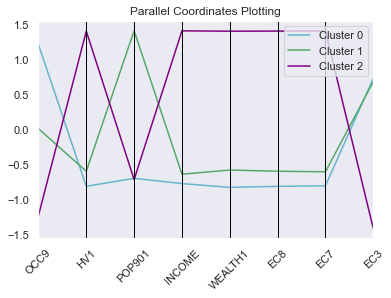

In [100]:
pd.plotting.parallel_coordinates(cluster_an_metric_sc, 'Cluster Name', color=('c', 'g', 'purple'))
plt.title("Parallel Coordinates Plotting")
plt.xticks(rotation=45)

In [101]:
# Observation for hobbies
for hobby in hobbies:
    vc=clustered.groupby('labels')[hobby].value_counts('Y')
    print(vc)

labels  COLLECT1
0                   0.943996
        Y           0.056004
1                   0.946289
        Y           0.053711
2                   0.956225
        Y           0.043775
Name: COLLECT1, dtype: float64
labels  VETERANS
0                   0.888018
        Y           0.111982
1                   0.904622
        Y           0.095378
2                   0.906898
        Y           0.093102
Name: VETERANS, dtype: float64
labels  BIBLE
0                0.902301
        Y        0.097699
1                0.918620
        Y        0.081380
2                0.938751
        Y        0.061249
Name: BIBLE, dtype: float64
labels  CATLG
0                0.917531
        Y        0.082469
1                0.931641
        Y        0.068359
2                0.913906
        Y        0.086094
Name: CATLG, dtype: float64
labels  HOMEE
0                0.991100
        Y        0.008900
1                0.992188
        Y        0.007812
2                0.987350
        Y       

(<matplotlib.axes._subplots.AxesSubplot at 0x25311e13f10>,
 Text(0.5, 1.0, 'Mean Income of the Clusters (INCOME)'),
 Text(0.5, 0, 'Cluster Names'),
 Text(0, 0.5, 'Mean Income'),
 (array([0, 1, 2]), <a list of 3 Text major ticklabel objects>))

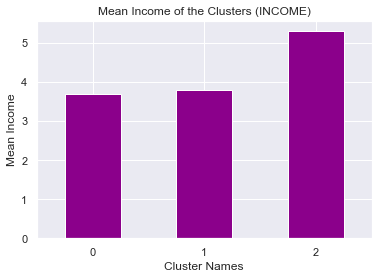

In [102]:
inspect['INCOME'].plot(kind='bar',color='darkmagenta'),plt.title("Mean Income of the Clusters (INCOME)"),plt.xlabel("Cluster Names"),plt.ylabel("Mean Income"),plt.xticks(rotation=0)

(<matplotlib.axes._subplots.AxesSubplot at 0x25311c7f610>,
 Text(0.5, 1.0, 'Mode of the Age of Clusters (AGE)'),
 Text(0.5, 0, 'Cluster Names'),
 Text(0, 0.5, 'Mode of the Age'),
 (array([0, 1, 2]), <a list of 3 Text major ticklabel objects>))

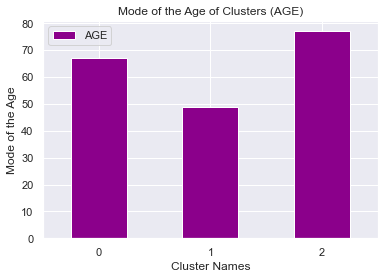

In [103]:
clustered.groupby('labels')['AGE'].agg(pd.Series.mode).to_frame().plot(kind='bar',color='darkmagenta'), plt.title("Mode of the Age of Clusters (AGE)"), plt.xlabel("Cluster Names"), plt.ylabel("Mode of the Age"), plt.xticks(rotation=0)

(<matplotlib.axes._subplots.AxesSubplot at 0x2531194ea00>,
 Text(0.5, 1.0, 'Number of People in Neighbourhood (POP901)'),
 Text(0.5, 0, 'Cluster Names'),
 Text(0, 0.5, 'Average Number of People'),
 (array([0, 1, 2]), <a list of 3 Text major ticklabel objects>))

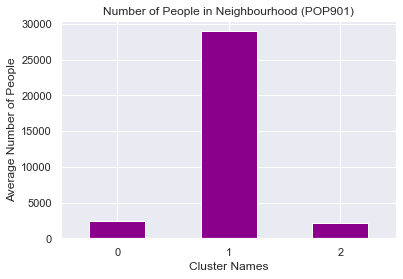

In [104]:
inspect['POP901'].plot(kind='bar',color='darkmagenta'), plt.title("Number of People in Neighbourhood (POP901)"), plt.xlabel("Cluster Names"), plt.ylabel("Average Number of People"), plt.xticks(rotation=0)

(<matplotlib.axes._subplots.AxesSubplot at 0x2531071a1c0>,
 Text(0.5, 1.0, 'Percent Adults 25+ Graduate Degree of Clusters (EC8)'),
 Text(0.5, 0, 'Cluster Names'),
 Text(0, 0.5, 'Average Percent Graduate Degree'),
 (array([0, 1, 2]), <a list of 3 Text major ticklabel objects>))

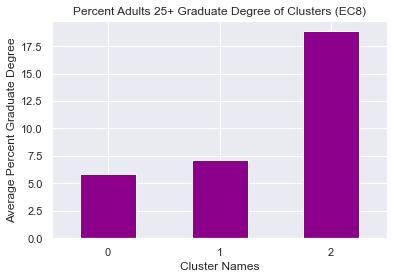

In [105]:
inspect['EC8'].plot(kind='bar',color='darkmagenta'),plt.title("Percent Adults 25+ Graduate Degree of Clusters (EC8)"),plt.xlabel("Cluster Names"),plt.ylabel("Average Percent Graduate Degree"),plt.xticks(rotation=0)

In [106]:
clustered.groupby('labels')['AGE'].agg(pd.Series.mode).to_frame() 

,AGE
labels,
0,67.0
1,49.0
2,77.0
